<a href="https://colab.research.google.com/github/TivsLThree/CAP-4630-Artificial-Intelligence/blob/master/Homework/HW2/HW2P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Just hit Ctrl + F9 to run all cells

### Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Create Points

In [0]:
np.random.seed(1569) # Change this to see different results
m = 200;
randomness = 2; # The higher this number is the worse the results will be. A greater randomness value will cause the Z to correlate less with the values of X and Y. 
# In essence, the higher this number the higher the randomness of the data set.
X = 2 * np.random.rand(m, 1);
Y = -3 * np.random.rand(m,1)
Z = 4 * X + 3 * Y +randomness * np.random.rand(m,1)
#print(Y)
xs = np.column_stack((X,Y))
ys = Z

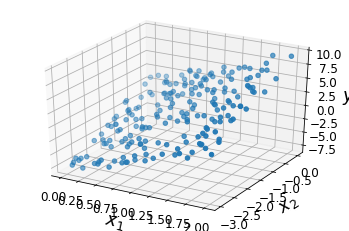

In [496]:
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("$x_1$", rotation = 0, fontsize = 18)
ax.set_ylabel("$x_2$", rotation = 0, fontsize = 18)
ax.set_zlabel("$y$", rotation = 0, fontsize = 18)
ax.scatter(X, Y, Z)


## Combine bias $b=w_0$ and weight $w_1$

In [0]:
X_b = np.column_stack([np.ones((m,1)), xs])
m = 100
# Set aside testing data
X_b_test = X_b[m:]
ys_test = ys[m:]

X_b = X_b[:m]
ys = ys[:m]
# This sets up our inital weights? I think
weight = initial_weight = np.random.randn(3,1)


### Mini-batch gradient descent 

In [498]:

weight_path_mgd = []
batch_size = 4
weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = ys[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)
# Errors
y_hat = X_b.dot(weight)
print("Expected: " + str(ys[0]), "\nGot: " + str(y_hat[0]))
print("Error: " + str(ys[0] - y_hat[0]))

Expected: [-4.84179497] 
Got: [-4.33837791]
Error: [-0.50341706]


### Graph predictions vs actual values

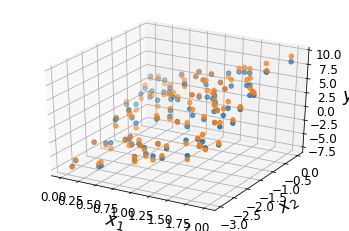

In [499]:
predicted = X_b_test.dot(weight)
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("$x_1$", rotation = 0, fontsize = 18)
ax.set_ylabel("$x_2$", rotation = 0, fontsize = 18)
ax.set_zlabel("$y$", rotation = 0, fontsize = 18)
X = np.reshape(X_b_test[:, 1], (200 - m,1))
Y = np.reshape(X_b_test[:, 2], (200 - m,1))
ax.scatter(X, Y, predicted)
ax.scatter(X, Y, ys_test)

### What is the Mean Squared Error?

In [500]:
mse = (np.square(ys_test - predicted)).mean(axis = None)
print(mse)

0.4540004826370961
